# 실습 0 데이터 불러오기 및 구성하기 

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer


# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder

# 지지도 계산
from mlxtend.frequent_patterns import apriori

# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [2]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NaNumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

# 실습 1. 군집분석

In [3]:
df_raw = pd.read_csv("./IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 먼저 데이터를 표준화하기전에 specie변수가 범주형인것을 확인해야한다.
le = LabelEncoder()
df_raw['SPECIES'] = le.fit_transform(df_raw['SPECIES'])


In [5]:
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

# 위에서부터 자료 5개 확인
df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 , -1.22474487],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 , -1.22474487]])

In [41]:
df_check=pd.DataFrame(df_raw_scaled)
df_check.describe()

,0,1,2,3,4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,-1.421085e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-1.224745e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-1.224745e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,0.000000e+00
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.224745e+00
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,1.224745e+00


In [7]:
# 목표 변수:모든 행 & 마지막열
df_raw_y = df_raw_scaled[:, -1]
# 설명 변수::모든 행 & 마지막째 제외한 모든 열
df_raw_x = df_raw_scaled[:,::-1]

- 군집분석은 비지도 학습이므로 목표변수와 설명변수를 분리할 필요가 없다고 하는데 왜 이렇게 분리를 했는지는 잘 모르겠다. 아마 군집들의 특성과 목표변수의 특성을 프로파일링 하기 위해서 나눈것으로 생각된다. 

In [8]:
df_raw_x

array([[-1.22474487e+00, -1.31544430e+00, -1.34022653e+00,
         1.01900435e+00, -9.00681170e-01],
       [-1.22474487e+00, -1.31544430e+00, -1.34022653e+00,
        -1.31979479e-01, -1.14301691e+00],
       [-1.22474487e+00, -1.31544430e+00, -1.39706395e+00,
         3.28414053e-01, -1.38535265e+00],
       [-1.22474487e+00, -1.31544430e+00, -1.28338910e+00,
         9.82172869e-02, -1.50652052e+00],
       [-1.22474487e+00, -1.31544430e+00, -1.34022653e+00,
         1.24920112e+00, -1.02184904e+00],
       [-1.22474487e+00, -1.05217993e+00, -1.16971425e+00,
         1.93979142e+00, -5.37177559e-01],
       [-1.22474487e+00, -1.18381211e+00, -1.34022653e+00,
         7.88807586e-01, -1.50652052e+00],
       [-1.22474487e+00, -1.31544430e+00, -1.28338910e+00,
         7.88807586e-01, -1.02184904e+00],
       [-1.22474487e+00, -1.31544430e+00, -1.34022653e+00,
        -3.62176246e-01, -1.74885626e+00],
       [-1.22474487e+00, -1.44707648e+00, -1.28338910e+00,
         9.82172869e-02

In [9]:
## 계층형 군집분석 실시
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [10]:
# 군집 생성 결과 확인
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.72216546e

Text(0, 0.5, 'Distance')

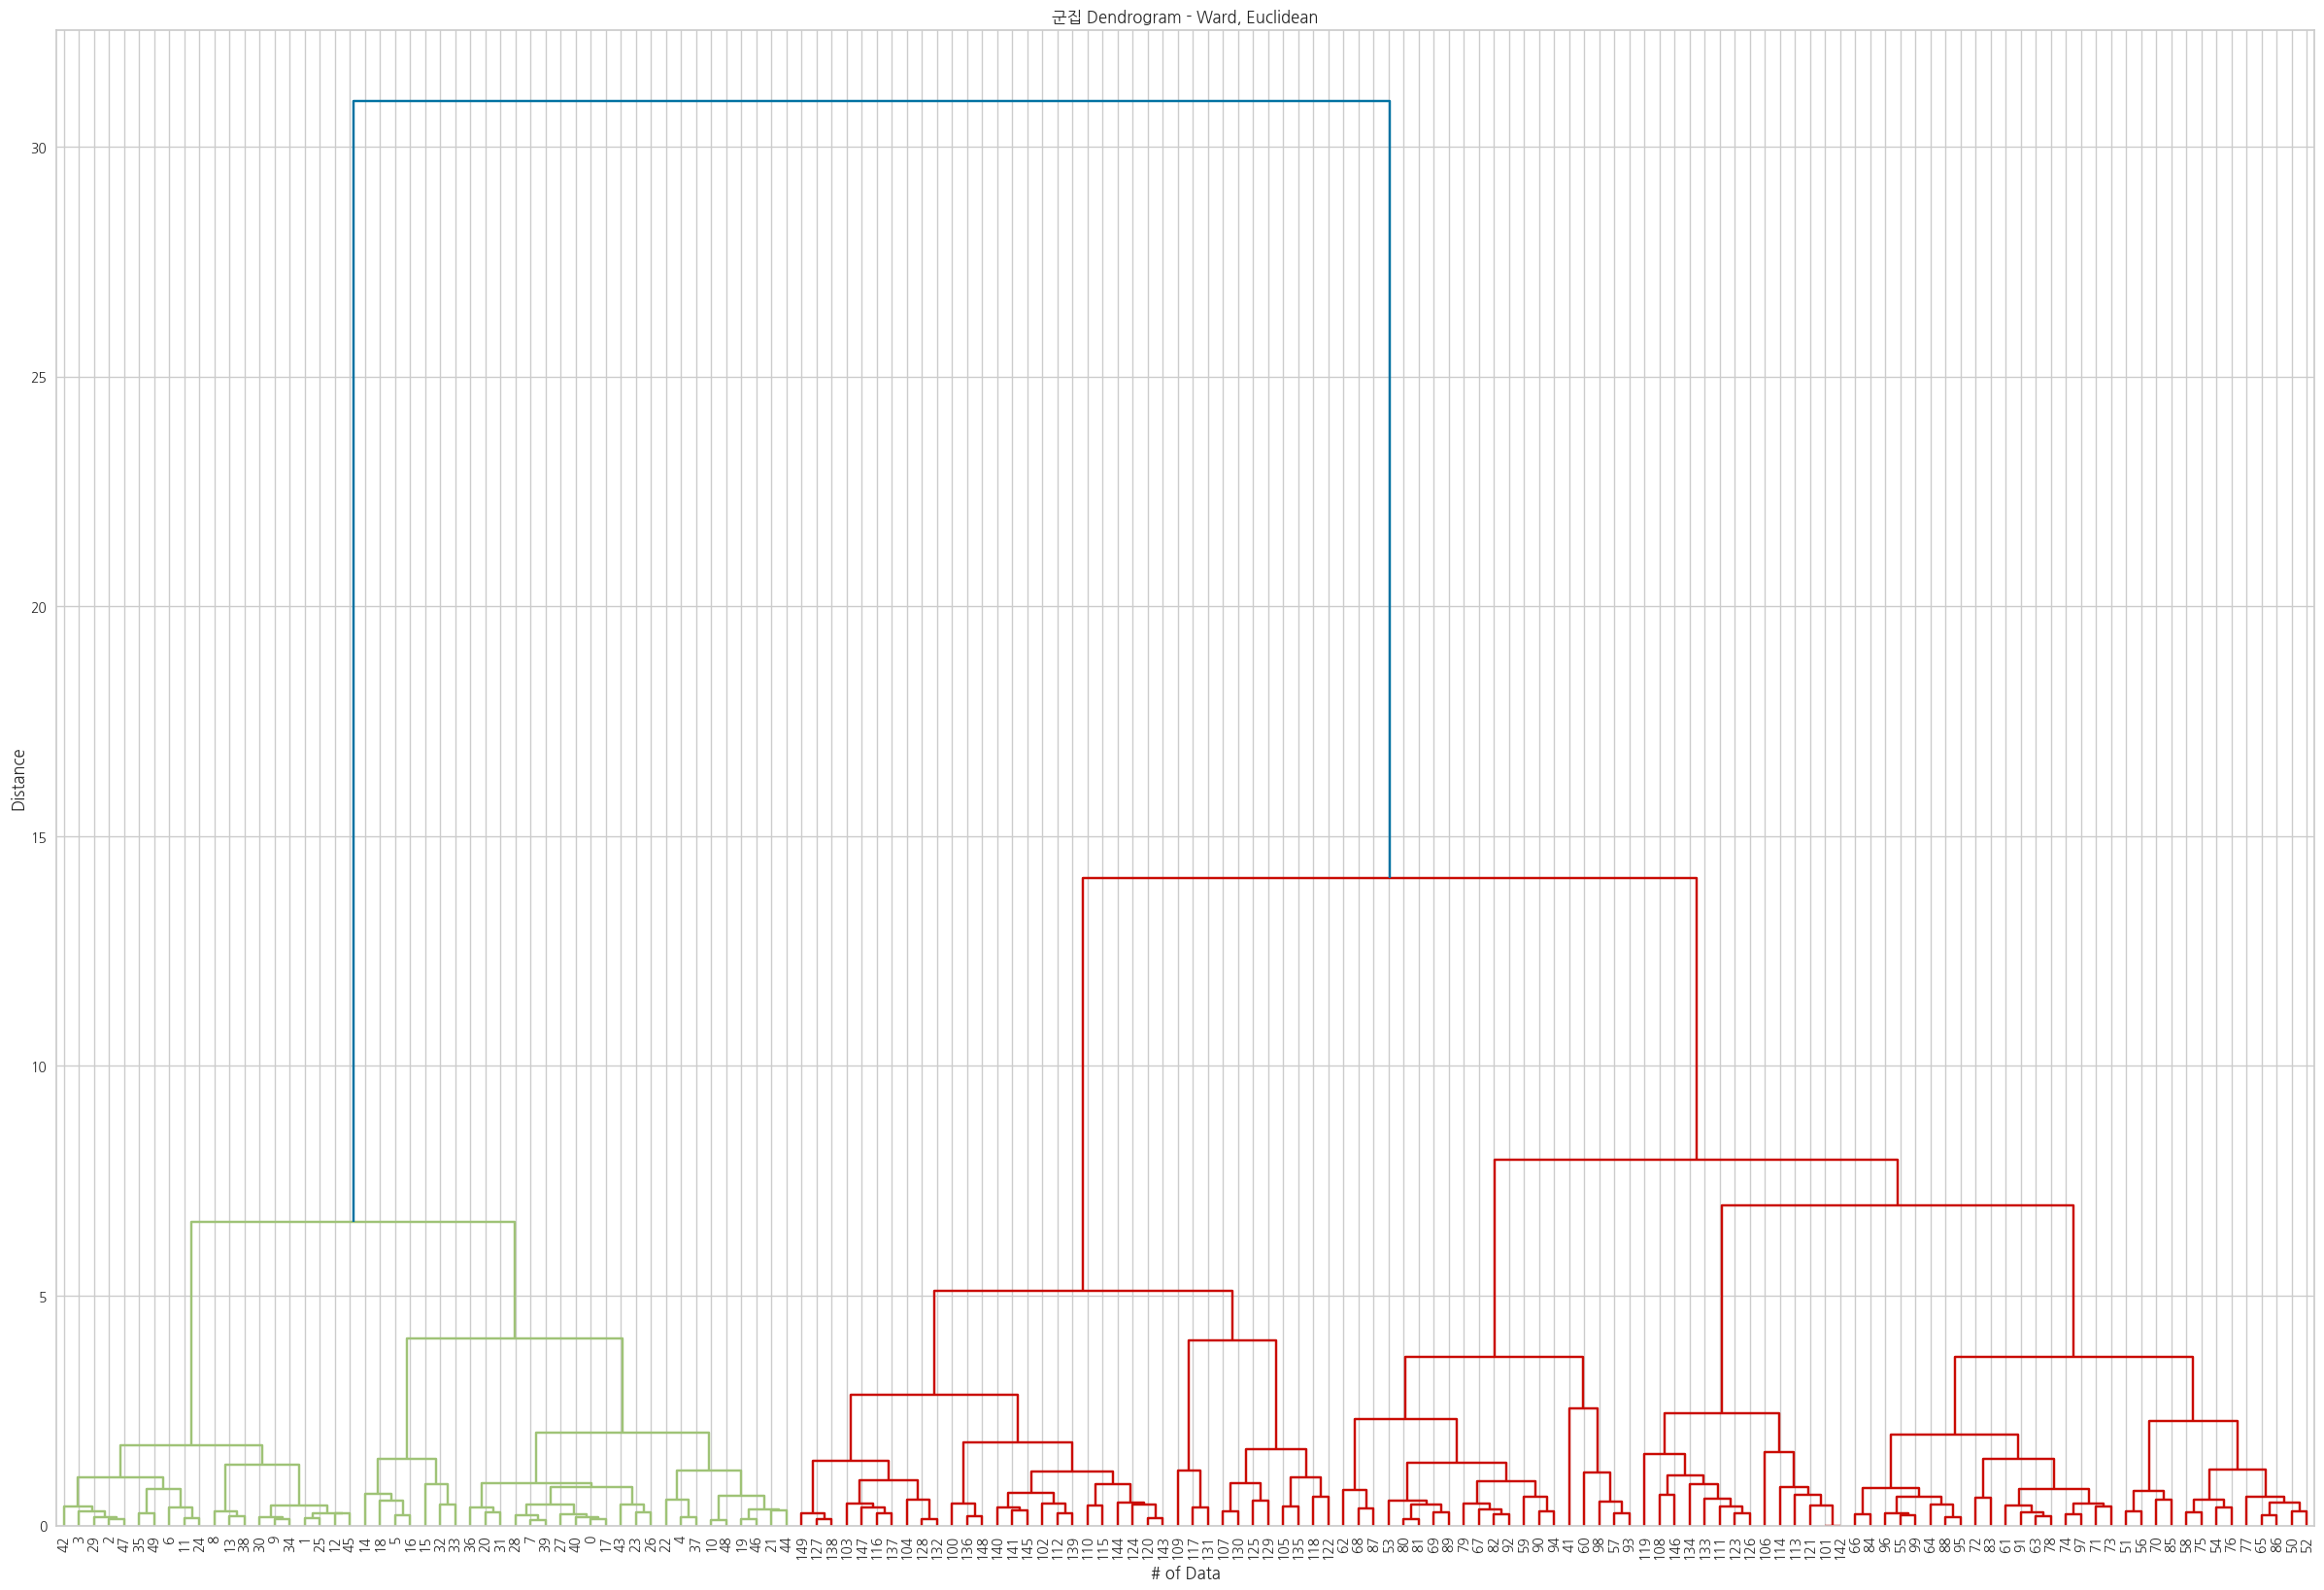

In [11]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(30,20))
ax = plt.subplot(111) 
# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

- 행의 개수가 워낙 많아 x축이 엄청나게 많이 나왔다. 크게는 두개~5개 정도의 군집으로 분리되는 것처럼 보인다.

Text(0, 0.5, 'Distance')

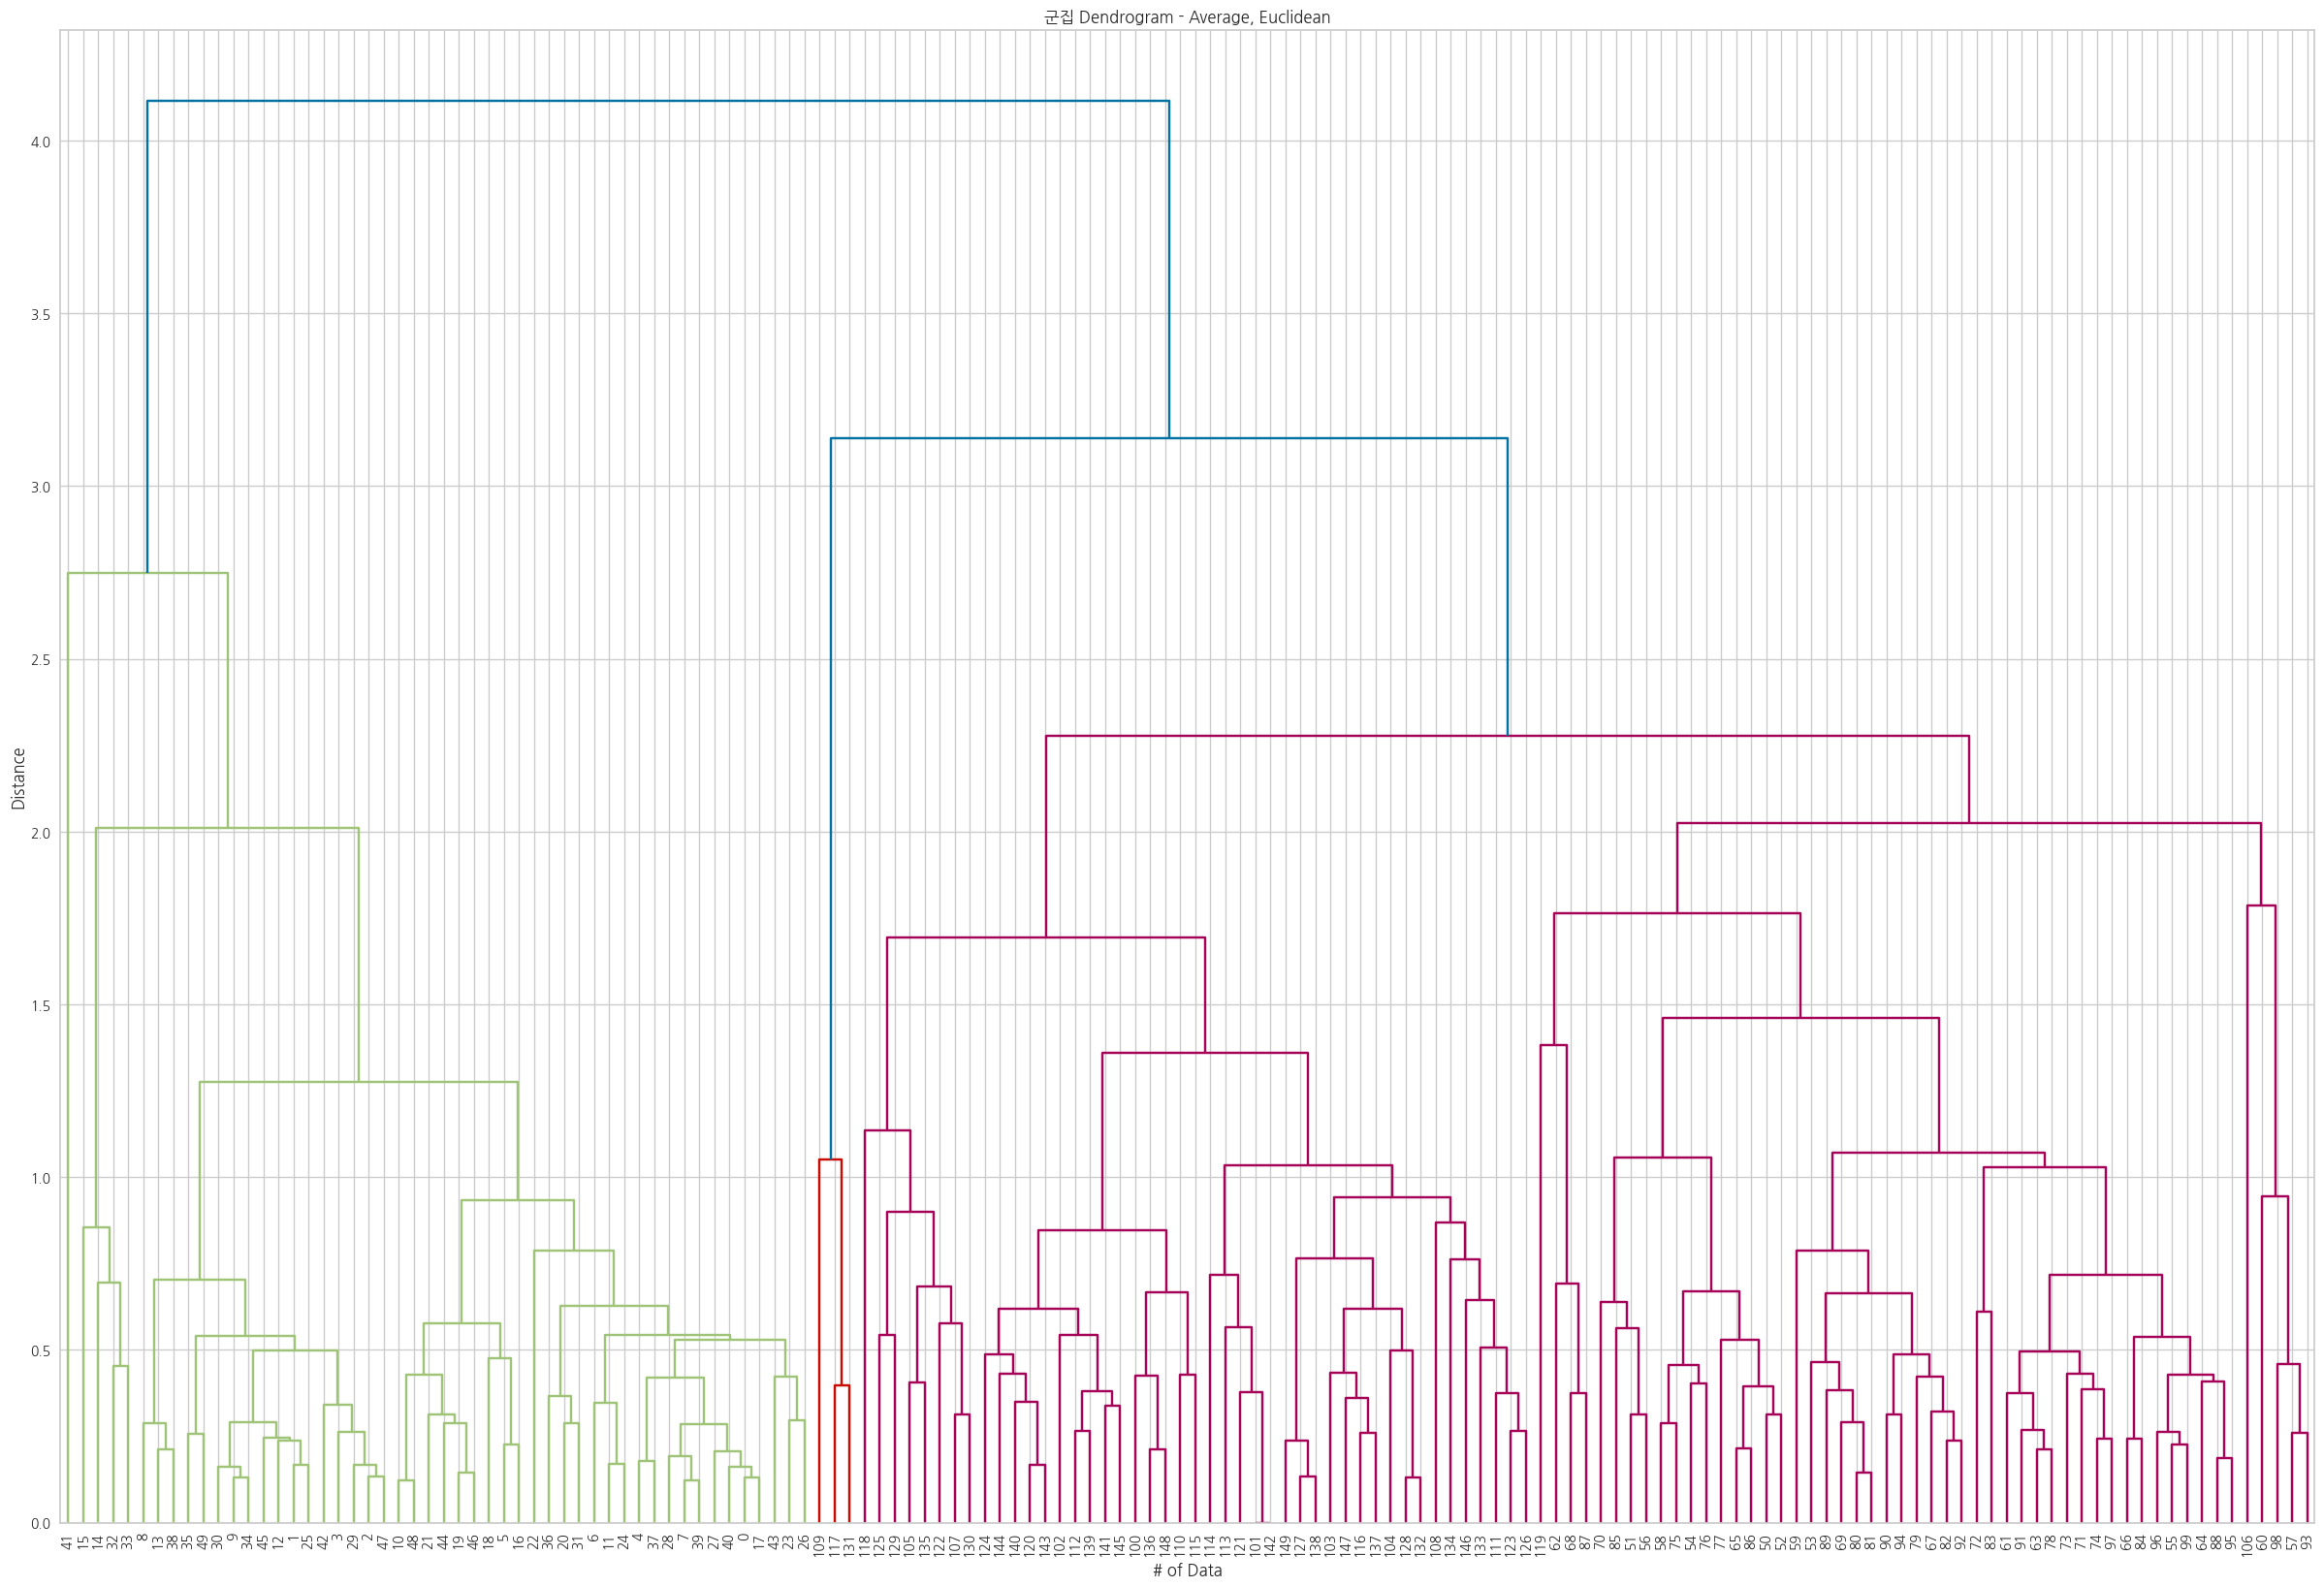

In [12]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(30,20))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

- 평균을 이용한 군집분석을 보면 와드와는 조금 다른데 여기서도 최대 5개의 군집을 사용하는 것이 적절치 않을까 생각된다. 

In [13]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 6, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,5
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,3


In [14]:
df_raw['cluster_H'].value_counts()

3    36
6    31
2    29
1    20
4    20
5    14
Name: cluster_H, dtype: int64

- 계층형 군집결과 6개의 군집이 생성되었다. 

In [15]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,4.720,5.0,2.9,3.140,3.4,1.1,1.440,1.9,0.1,0.195,0.3,0,0.00,0
1,2,4.6,5.221,5.8,3.3,3.666,4.4,1.0,1.483,1.9,0.1,0.279,0.6,0,0.00,0
2,3,5.9,6.819,7.9,2.6,3.108,3.8,4.8,5.733,6.9,1.6,2.106,2.5,2,2.00,2
3,4,4.5,5.500,6.3,2.0,2.445,2.7,1.3,3.735,4.5,0.3,1.115,1.5,0,0.95,1
4,5,4.9,5.993,6.7,2.2,2.629,2.8,4.5,5.086,5.8,1.4,1.821,2.4,2,2.00,2
5,6,5.4,6.171,7.0,2.5,2.965,3.4,3.6,4.503,5.1,1.2,1.429,1.8,1,1.00,1


- 각 군집별로 평균들을 살펴본 결과 분포가 달랐다. 

In [16]:
df_summary_H.columns

Index(['cluster_H', 'SEPAL_LENGTH_min', 'SEPAL_LENGTH_mean',
       'SEPAL_LENGTH_max', 'SEPAL_WIDTH_min', 'SEPAL_WIDTH_mean',
       'SEPAL_WIDTH_max', 'PETAL_LENGTH_min', 'PETAL_LENGTH_mean',
       'PETAL_LENGTH_max', 'PETAL_WIDTH_min', 'PETAL_WIDTH_mean',
       'PETAL_WIDTH_max', 'SPECIES_min', 'SPECIES_mean', 'SPECIES_max'],
      dtype='object')

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'SPECIES'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'cluster_H'}, xlabel='cluster_H'>]],
      dtype=object)

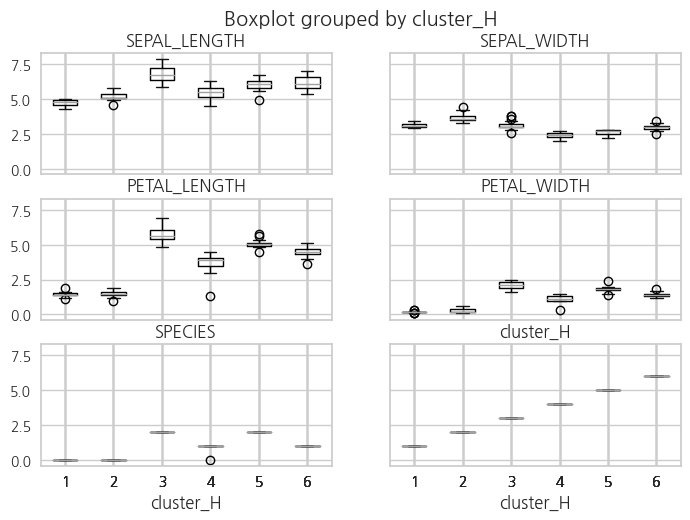

In [17]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=df_raw.columns.tolist()
               , by = "cluster_H")

<Axes: title={'center': 'SPECIES'}, xlabel='cluster_H'>

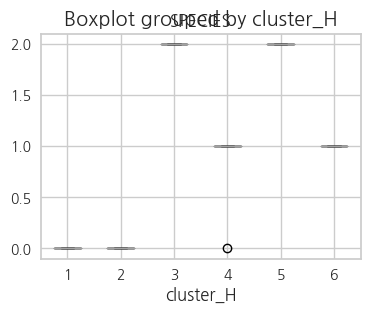

In [18]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["SPECIES"], by = "cluster_H", figsize=(4,3))

- 위에 결과를 토대로 살펴본결과 각 변수마다 군집별로 분포들이 달랐다, 
- 이것은 클러스터 내부에 목표변수에서도 나타나는데 3,5 군집은 높게 나타나고 1,2 군집은 낮게 나타나는 특성을 보였다. 
- 아무래도 변수별로 범위에 따라 다른 군집이 형성 된것 같다

In [19]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

,NumberofCluster,Error
0,1,750.000
1,2,259.862
2,3,162.171
3,4,134.647
4,5,109.123
5,6,85.135
6,7,75.305
7,8,66.226
8,9,57.634
9,10,50.255


Text(0, 0.5, 'Sum of Square')

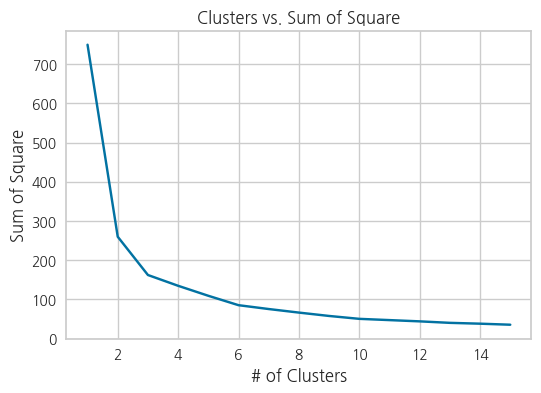

In [20]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

- 군집간에 오류를 계산하였다. 최대 군집수가 늘어날수록 오류의 합이 점차 줄어드는 모습을 보인다. 이를 토대로 최적의 군집 개수를 구 할 수있을 것이다.

In [21]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,0,2,3
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,2,3
5,5.4,3.9,1.7,0.4,0,2,3
6,4.6,3.4,1.4,0.3,0,1,1
7,5.0,3.4,1.5,0.2,0,2,3
8,4.4,2.9,1.4,0.2,0,1,1
9,4.9,3.1,1.5,0.1,0,1,1


In [22]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,4.727,5.1,2.3,3.109,3.4,1.1,1.445,1.9,0.1,0.214,0.5,0,0.000,0
1,2,5.6,6.635,7.9,2.5,3.000,3.8,4.8,5.585,6.9,1.4,2.044,2.5,2,2.000,2
2,3,4.6,5.225,5.8,3.4,3.679,4.4,1.0,1.475,1.9,0.1,0.271,0.6,0,0.000,0
3,4,4.9,5.543,6.3,2.0,2.443,2.7,3.0,3.948,5.0,1.0,1.200,1.7,1,1.095,2
4,5,5.4,6.171,7.0,2.5,2.965,3.4,3.6,4.503,5.1,1.2,1.429,1.8,1,1.000,1


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SPECIES'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'cluster_H'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'cluster_KM'}, xlabel='cluster_KM'>,
        <Axes: >, <Axes: >]], dtype=object)

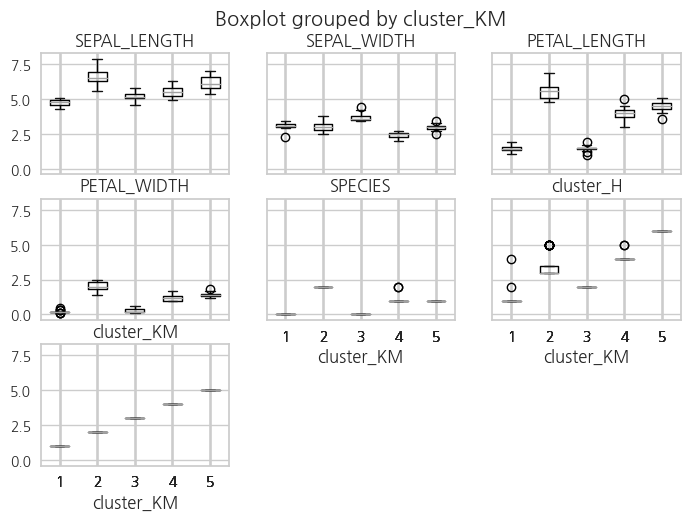

In [23]:
# Boxplot을 활용한 군집별 변수 분포
df_raw.boxplot(column=df_raw.columns.tolist()
               , by = "cluster_KM")

- kmean 군집으로 5개의 군집을 형성하였으나 이번에는 2,5번 군집이 꽃밭침 길이가 길었고 꽃잎 기리와 너비는 2,4,5 모두 높았다. 

<Axes: title={'center': 'SPECIES'}, xlabel='cluster_KM'>

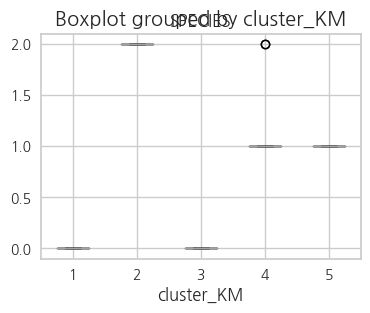

In [24]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["SPECIES"], by = "cluster_KM", figsize=(4,3))

- 일반적으로 데이터 셋의 목표변수인 종이 3개인데 각각 3단계로 나누어진 모습을 확인 할수 있었다. 이를 통해 볼때 적절하게 구분하고 있는 것으로 확인 할 수 있는데 다만 군집의 개수가 홀수라 3개의 종을 다 따로 분류하지는 못하고 있는 듯 보인다.

In [25]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.47
계층형(군집 수=4) 실루엣 계수 =  0.412


In [26]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.477
k-평균(군집 수=4) 실루엣 계수 =  0.446


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 실루엣 계수가 군집이 3개일 때 모두 높았는데 이는 목표변수였던 품종의 개수가 3개 였기 때문이라고 생각된다. 아마 품종이 군집에 개수에 영향을 미치고 군집에 따라 설명변수가 달라지기 때문에 적절한 군집이 3개인것으로 확인된다.

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

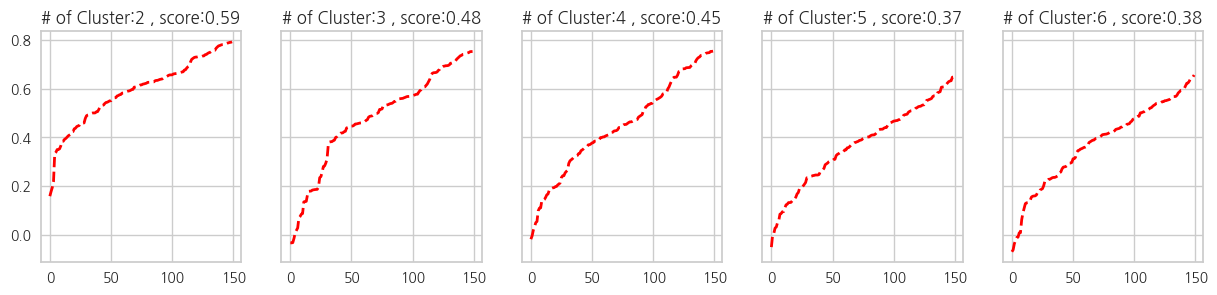

In [27]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


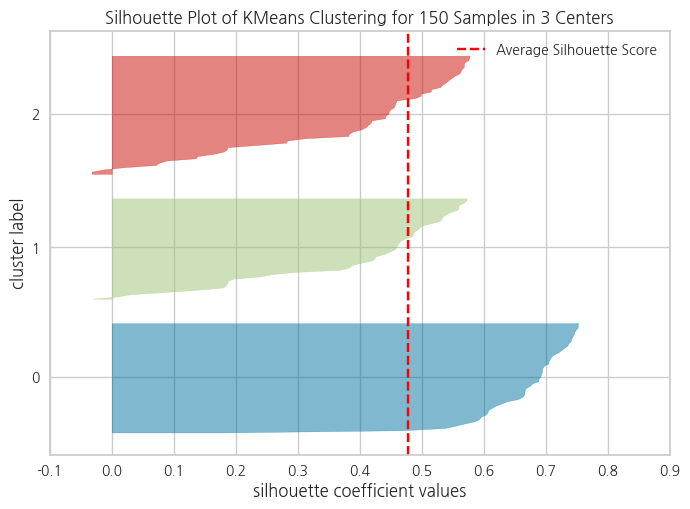

실루엣 계수 =  0.4772


In [28]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


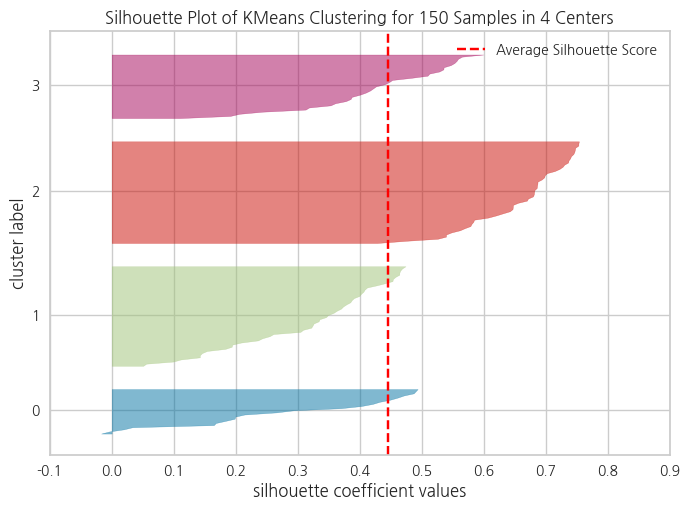

실루엣 계수 =  0.4458


In [29]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


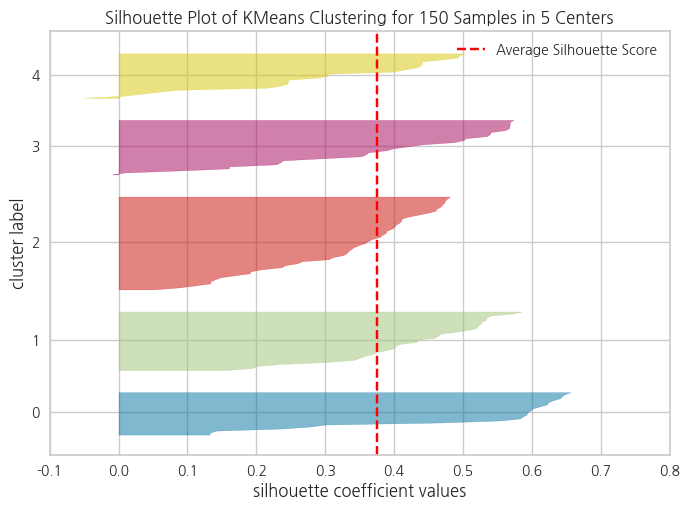

실루엣 계수 =  0.3745


In [30]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

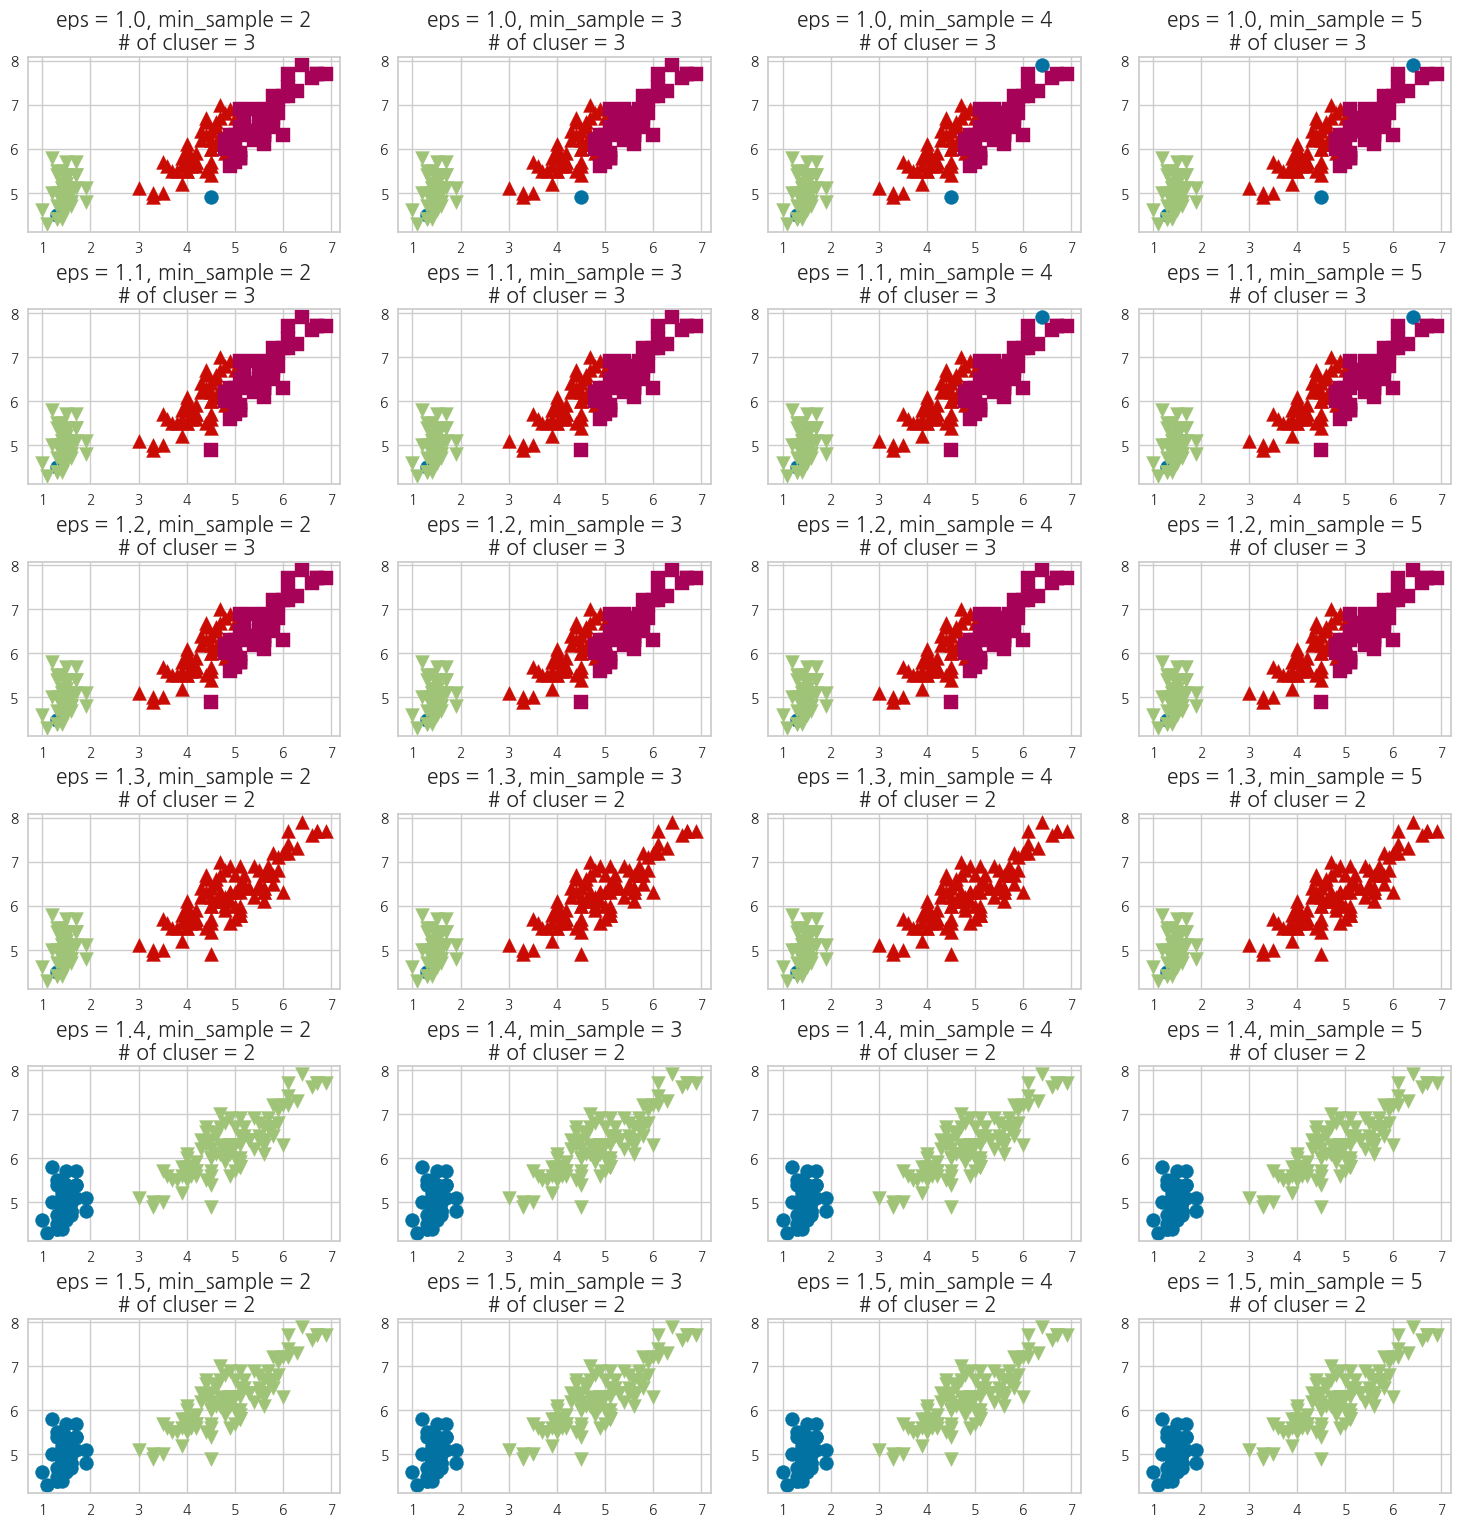

In [31]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["PETAL_LENGTH"]
Y = df_raw["SEPAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)


In [32]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_DB = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM,cluster_DB
0,5.1,3.5,1.4,0.2,0,2,3,1
1,4.9,3.0,1.4,0.2,0,1,1,1
2,4.7,3.2,1.3,0.2,0,1,1,1
3,4.6,3.1,1.5,0.2,0,1,1,1
4,5.0,3.6,1.4,0.2,0,2,3,1


In [33]:
# DB 스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"],
                                   axis = 1,
                                   inplace=False).\
                groupby("cluster_DB").agg(["min", "mean", "max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)


,cluster_DB,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6,0,0.0,0
1,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5,1,1.5,2


# 실습 2. 연관 규칙 분석

In [34]:
df_raw = pd.read_csv("./구매이력.csv", encoding='euc-kr')
df_raw.head()

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주


In [35]:
# 고객 ID 리스트 행성 및 정렬
ID = list(set(df_raw["ID"]))
ID.sort()

# 고객ID별 상품 매칭
list_association = []
for i in ID:
    # ID별 구매 데이터 추출
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    # ID별 구매 데이터를 리스트에 담기
    list_association.append(tmp_list)

# 리스트 출력
for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [36]:
# Items 기준으로 포함 여부에 따라 True/False 로 변환
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = list_association)

# 함수 fit_transform 는 데이터를 행렬의 형태로 반환, pandas의 DataFrame의 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)

df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


In [37]:
# 규칙 선택 최소 지지
v_min_support = 0.3

# 연관규칙 생성 및 지지도 임계값 적용
# df_freq = apriori(df_asso, min_support = 0.4, use_colnames = True)  # 직접 입력 
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True) # 매개값 사용

# itemsets 항목 확인
df_freq.round(3) 
# df_freq[9:16].round(3) # 부분 확인

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.395,"(맥주, 크래커)"


In [42]:
#향상도 기준 : lift
df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 0.3)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076


- 향상도를 기준으로 살펴본봐 장바구니의 구성이 맥주, 소다, 양주 ,콜라 ,크래커로 많지가 았았고 
- 0.3 이라는 낮은 임계값에도 불구하고 같이 구매를 한것은 맥주와 크래커로 판탄된다.

In [39]:
#신뢰도 기준:confidence
df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.3)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076


- 신뢰도를 기준으로 살펴봐도 가장 빈도가 높게 측정이 되는것 즉 함께 구매를 하는 것은 맥주와 크래커가 가장 많았던 것으로 보인다.